# Classification using Clustering

Clustering is an unsupervised method used for grouping data together when you do not know which class each data point is part of.  Each data point gets put into a specific class based upon it's features and the features of the other data points. Some examples of unsupervised learning include K-means clustering and association.

The visual below shows the placement of data points in 2-D space based upon some characteristics.  The x-axis may be width and the y-axis may be height, both scaled so the values are between 0 and 1.  In this case, we do not know which class each data point belongs to before they are placed in space.  The 3 lines divide the data points into groups.  All points to the top left are classified in the red group, those to the right are in the blue group, those at the bottom are in the green group.  The goal now is to try to determine if this division of data points into these 3 groups is correct.

![title](./images/Clustering_01.JPG)
Image from https://aws.amazon.com/blogs/machine-learning/k-means-clustering-with-amazon-sagemaker/

# Classifying Data Points using K-means clustering

* K-means clustering is an unsupervised method used to classify data.  The steps to K-means clustering are simple.

* First, select K number of random points to use as cluster centers. These cluster centers are called centroids. In this image, the blue and red squares are the centroids. There are 2 centroids, so K=2.  The value of K determines how many classes the data points are classified into, so picking the correct value of K is important.  With K=2, the data points will be divided into 2 classes.
![title](./images/K-means_01.JPG)

* Second, calculate the distance for each data point to the closest centroid and assign the point to that cluster. 
![title](./images/K-means_02.JPG)

* Third, calculate where the new cluster center should be by computing the average of the distance for each assigned point to the centroid.  Move the centroid to that location.
![title](./images/K-means_03.JPG)

* Last, keep repeating these steps until none of the cluster assignments change.
![title](./images/K-means_04.JPG)
Images from https://towardsdatascience.com/machine-learning-algorithms-part-9-k-means-example-in-python-f2ad05ed

# Let's see K-means clustering in action using the famous Iris dataset again
(https://archive.ics.uci.edu/ml/datasets/iris)

![title](./images/Irises.jpg)

In [1]:
# Imports
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn import datasets, neighbors
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from yellowbrick.cluster import KElbowVisualizer


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning:

The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.



### Import and load the Iris dataset

In [2]:
# Load the Iris dataset
iris = datasets.load_iris()

# Print the class names 
# These are the names of the Iris species.  We are trying to classify 
# new, previously unclassified irises as one of these species.
print("***Class Names***")
for item in iris.target_names:
    print(item)

# Print the feature names
# These are the values we will use to perform our classifications
print("\n***Feature Names***")
for item in iris.feature_names:
    print(item)
    
print("\n")

# Define features and target from the dataframe that was created by importing the dataset
# X will be all 4 features
X = iris.data[:, :4]
# y is the type of flower
y = iris.target

***Class Names***
setosa
versicolor
virginica

***Feature Names***
sepal length (cm)
sepal width (cm)
petal length (cm)
petal width (cm)




### Plot the Iris data using sepal length versus sepal width.  

The plot below is actually labeled data since we already know which classes the data points are in.  Each color in the scatterplot represents one of the 3 different classes.  

You may be asking "Hey, why are you plotting labeled data?  I thought K-means clustering was unsupervised and tried to group and classify unlabeled data???"  That is true.  The reason for plotting the labeled data is so we can later see how well K-means is performing in relation to the actual values.  

Text(0.5, 1.0, 'Sepal Length vs Sepal Width per Category')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


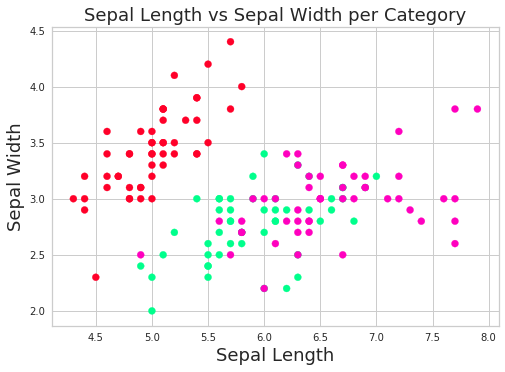

In [3]:
# Plot the labeled data

plt.scatter(X[:,0], X[:,1], c=y, cmap='gist_rainbow')
plt.xlabel('Sepal Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)
plt.title('Sepal Length vs Sepal Width per Category', fontsize=18)

# For fun, try plotting different features

### Let's perform K-means clustering and fit the data.  With K-means, it's not really training since the data is not "officially" labeled.

In this cell, we will: 

* Use K = 3 (n_clusters) since we know there are 3 classes.  For fun, try changing it to something else.
* Display the coordinates of the centers (centroids) that are found.  There are 4 values for the location of the centroid since there values for 4 different features.
* Display how the first 5 flowers (data points) are classified.

In [4]:
# Initiate KMeans clustering
km = KMeans(n_clusters = 3, random_state=21)
# Fit the model
km.fit(X)

#Display the coordinates of the centers
centers = km.cluster_centers_
print("***The coordinates of the centers (centroids) for the centroids are: ***")
print(centers)
print("\n")

# Display the classification for the first 5 data points (flowers)
print("***Classifications***")
for i in range(5):
    print("Flower " + str(i+1) + " with sepal length " + str(X[i,0]) + " and sepal width " + str(X[i,1]) + 
          " was classified in class " + str(km.labels_[i]) + ".")



***The coordinates of the centers (centroids) for the centroids are: ***
[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


***Classifications***
Flower 1 with sepal length 5.1 and sepal width 3.5 was classified in class 1.
Flower 2 with sepal length 4.9 and sepal width 3.0 was classified in class 1.
Flower 3 with sepal length 4.7 and sepal width 3.2 was classified in class 1.
Flower 4 with sepal length 4.6 and sepal width 3.1 was classified in class 1.
Flower 5 with sepal length 5.0 and sepal width 3.6 was classified in class 1.


### Plot the color-coded classification data from above versus the predicted classifications to see how well the clustering performs.

As you can see on the plots, the classifications are pretty good overall.

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


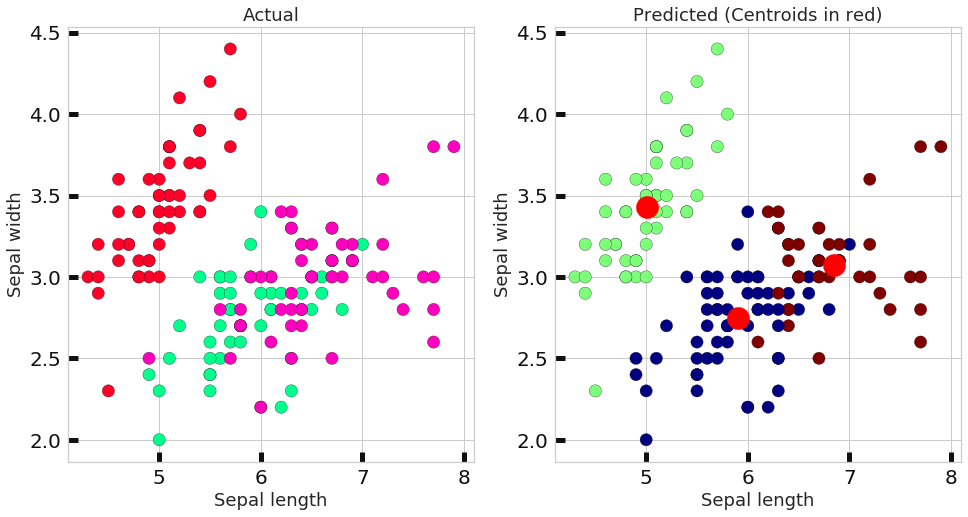

In [5]:
# This will tell us to which cluster the data points belong to as determined by K-means.
new_labels = km.labels_

# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='gist_rainbow',
edgecolor='k', s=150)
axes[1].scatter(X[:, 0], X[:, 1], c=new_labels, cmap='jet',
edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted (Centroids in red)', fontsize=18)

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=500, c='red')


### But what if we don't know how many centroids we need.  In other words, we don't know what value to use for K.  We can use something called the "Elbow Method" to determine the optimal value of K.

With the Elbow Method, you try different values of K, starting with 1 and going to some higher value.  The Within Cluster Sum of Squares is computed for each value of K.  The Within Cluster Sum of Squares (WCSS), also called inertia, is the sum of the squared distances from each centroid to each data point that is classified in the group that centroid defines.  We want to find a value of K where the graph makes an "elbow."  This is roughly the point where the number of centroids correctly minimizes the WCSS without overfitting and adding too many centroids.

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


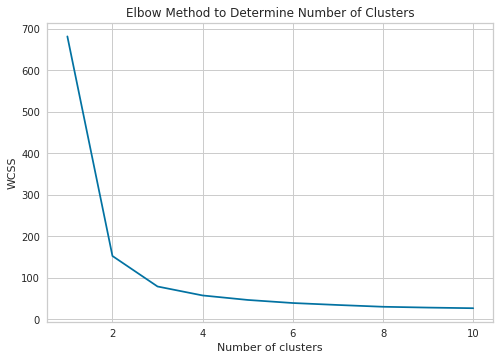

In [6]:
# First, create a list to hold the Within Cluster Sum of Squares
wcss = []

# Test values of K from 1 to 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    
    # Inertia is the sum of the squared distances to their closest cluster center
    wcss.append(kmeans.inertia_)

# Create Elbow plot showing values of inertia at each value of K
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method to Determine Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

You can also use a handy method called the KElbowVisualizer to find the optimum value of K.  After the value is determined, it will draw a vertical dotted line at that value of K.  In this example, we use the same range for K as above.  Notice it determines that K=3 is the optimal value.  From our knowledge of the Iris dataset, we know that this is the correct value for what K should be.

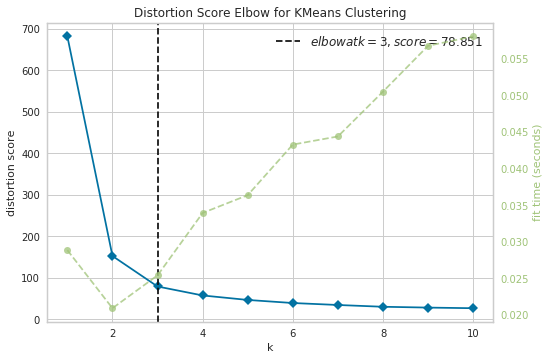

In [7]:
# Create the visualizer
visualizer = KElbowVisualizer(kmeans, k=(1,11))

# Fit the data to the visualizer
visualizer.fit(X)
# Create the plot
visualizer.show()        

# Classification and Clustering using Phylogenetic Trees

### Phylogenetic trees are used to cluster  based on evolutionary relationships.  This is typically done with DNA or protein sequences.

In the example below, amino acid sequences for a protein are aligned with each other.  Using this alignment, a phylogenetic tree can be constructed that shows the relationship between sequences.  Sequences that are most closely related cluster together.  Those that are more distantly related cluster farther apart.  From this, the evolutionary relationships can be determined.

### Example of a protein alignment

![title](./images/Protein_Align_01.JPG)

Image from https://www.researchgate.net/figure/Multiple-protein-sequence-alignment-of-HTT-exon-29-Multiple-protein-sequence-alignment_fig2_285557303

### A phylogenetic tree can be made from a sequence alignment.

![title](./images/Phylo_01.JPG)

### Let's create an alignment of protein sequences from the SARS-CoV-2 virus surface glycoprotein (S) region using Clustal Omega. 
The link for Clustal Omega is below. The dataset is named SARS_CoV_2_Protein_Seqs.txt and can be found in the data folder.  After the alignment is finished, you can create a phylogenetic tree.  Give it a try.

https://www.ebi.ac.uk/Tools/msa/clustalo/
https://github.com/pacejohn/Basics_of_Machine_Learning_and_Artificial_Intelligence/blob/master/data/SARS_CoV_2_Protein_Seqs.txt

Credits
* https://medium.com/@belen.sanchez27/predicting-iris-flower-species-with-k-means-clustering-in-python-f6e46806aaee
* https://towardsdatascience.com/machine-learning-algorithms-part-9-k-means-example-in-python-f2ad05ed5203
* https://linkinghub.elsevier.com/retrieve/pii/S1286-4579(20)30049-6

